In [2]:
from sklearn import svm
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import numpy as np

In [3]:
filename = 'data1.mat'
data = loadmat(filename)
#print(data)
data_x = data['X']
data_y = data['y']
print(data_x.shape,data_y.shape)
data = np.concatenate((data_y,data_x),axis=1)
#print(data)

(863, 2) (863, 1)


In [22]:
#数据集划分
data_train, data_test = train_test_split(data, test_size=0.3, random_state=66)
train_y = data_train[:,0]
train_x = data_train[:,1:]
test_y = data_test[:,0]
test_x = data_test[:,1:]
print(train_y.shape,train_x.shape)
print(test_y.shape,test_x.shape)

(604,) (604, 2)
(259,) (259, 2)


In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

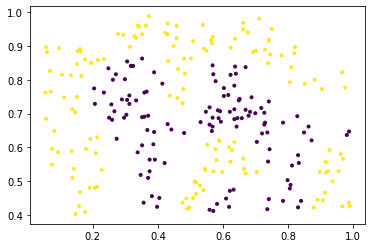

In [24]:
plt.scatter(test_x[:,0], test_x[:,1], marker='.',c=test_y)

In [37]:
#模型训练
#决策树
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2,
                                                min_samples_split=20,
                                                min_samples_leaf=5),n_estimators=100, random_state=0,learning_rate=1)
clf.fit(train_x,train_y)
#print(clf.predict(test_x))
clf.score(test_x, test_y)

0.9845559845559846

In [70]:
#分类器数量测试num=50
#决策树
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2,
                                                min_samples_split=20,
                                                min_samples_leaf=5),n_estimators=50, random_state=0,learning_rate=1)
clf.fit(train_x,train_y)
clf.score(test_x, test_y)

0.9691119691119691

In [71]:
#分类器数量测试num=200
#决策树
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2,
                                                min_samples_split=20,
                                                min_samples_leaf=5),n_estimators=200, random_state=0,learning_rate=1)
clf.fit(train_x,train_y)
clf.score(test_x, test_y)

0.9806949806949807

In [74]:
#分类器数量测试num=300
#决策树
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2,
                                                min_samples_split=20,
                                                min_samples_leaf=5),n_estimators=300, random_state=0,learning_rate=1)
clf.fit(train_x,train_y)
clf.score(test_x, test_y)

0.9768339768339769

In [79]:
#分类器数量测试num=300
#决策树
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2,
                                                min_samples_split=20,
                                                min_samples_leaf=5),n_estimators=300, random_state=0,learning_rate=0.8)
clf.fit(train_x,train_y)
clf.score(test_x, test_y)

0.9806949806949807

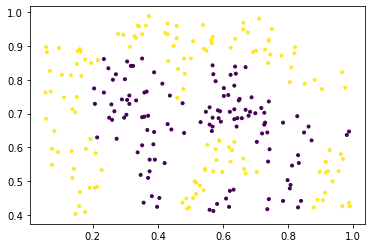

In [38]:
plt.scatter(test_x[:,0], test_x[:,1], marker='.',c=clf.predict(test_x))

In [53]:
#朴素贝叶斯
import sklearn.naive_bayes as bayes
clf1 = AdaBoostClassifier(bayes.BernoulliNB(alpha=1.0,binarize=0.0,fit_prior=True,class_prior=None),n_estimators=100,random_state=0,learning_rate=1)
clf1.fit(train_x,train_y)
clf1.score(test_x, test_y)

0.5444015444015444

In [65]:
#逻辑回归
from sklearn.linear_model import LogisticRegression
clf2 = AdaBoostClassifier(LogisticRegression(penalty='l2',dual=False,n_jobs=1,random_state=20),n_estimators=50,random_state=0,learning_rate=1)
clf2.fit(train_x,train_y)
clf2.score(test_x, test_y)

0.5328185328185329

In [81]:
#svm
from sklearn.svm import SVC
clf3 = AdaBoostClassifier(SVC( kernel='rbf'),algorithm='SAMME',n_estimators=100,random_state=0,learning_rate=1)
clf3.fit(train_x,train_y)
clf3.score(test_x, test_y)

0.5444015444015444

In [91]:
#随机森林
from sklearn.ensemble import RandomForestClassifier
clf_a = RandomForestClassifier(max_depth=10, random_state=0,n_estimators=25)
clf_a.fit(train_x,train_y)
clf_a.score(test_x, test_y)

0.9845559845559846

In [105]:
#调参
#n_estimators
for i in range(25,500,25):
    clf_a1 = RandomForestClassifier(n_estimators=i,criterion='gini',max_depth=10 ,min_samples_split=2,random_state=0)
    clf_a1.fit(train_x,train_y)
    print(i,clf_a1.score(test_x, test_y))

25 0.9845559845559846
50 0.9845559845559846
75 0.9845559845559846
100 0.9845559845559846
125 0.9884169884169884
150 0.9884169884169884
175 0.9845559845559846
200 0.9806949806949807
225 0.9884169884169884
250 0.9884169884169884
275 0.9884169884169884
300 0.9884169884169884
325 0.9845559845559846
350 0.9806949806949807
375 0.9806949806949807
400 0.9806949806949807
425 0.9806949806949807
450 0.9806949806949807
475 0.9806949806949807


In [107]:
#调参
#criterion
clf_a2 = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10 ,min_samples_split=2,random_state=0)
clf_a2.fit(train_x,train_y)
print(clf_a2.score(test_x, test_y))

0.9884169884169884


In [108]:
#max_depth
for j in range(2,20):
    clf_a3 = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=j ,min_samples_split=2,random_state=0)
    clf_a3.fit(train_x,train_y)
    print(j,clf_a3.score(test_x, test_y))

2 0.7567567567567568
3 0.8262548262548263
4 0.8571428571428571
5 0.8957528957528957
6 0.915057915057915
7 0.9575289575289575
8 0.9768339768339769
9 0.9884169884169884
10 0.9884169884169884
11 0.9845559845559846
12 0.9884169884169884
13 0.9884169884169884
14 0.9884169884169884
15 0.9884169884169884
16 0.9884169884169884
17 0.9884169884169884
18 0.9884169884169884
19 0.9884169884169884


In [109]:
#min_samples_split
for j in range(2,20):
    clf_a4 = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth= 9,min  _samples_split=j,random_state=0)
    clf_a4.fit(train_x,train_y)
    print(j,clf_a4.score(test_x, test_y))

2 0.9884169884169884
3 0.9845559845559846
4 0.9768339768339769
5 0.9768339768339769
6 0.9768339768339769
7 0.9768339768339769
8 0.972972972972973
9 0.9652509652509652
10 0.9652509652509652
11 0.9652509652509652
12 0.9652509652509652
13 0.972972972972973
14 0.9691119691119691
15 0.9691119691119691
16 0.9691119691119691
17 0.9691119691119691
18 0.9691119691119691
19 0.9691119691119691


In [172]:
#使用Iris数据集分别对adaboost和随机森林进行训练
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=66) # 数据划分

In [173]:
#adaboost
clf_c = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2,
                                                min_samples_split=50,
                                                min_samples_leaf=6),n_estimators=100, random_state=0,learning_rate=1)
clf_c.fit(X_train,Y_train)
clf_c.score(X_test,Y_test)

0.9111111111111111

In [150]:
clf_c = AdaBoostClassifier(LogisticRegression(),n_estimators=300, random_state=0,learning_rate=0.8)
clf_c.fit(X_train,Y_train)
clf_c.score(X_test,Y_test)

0.9777777777777777

In [175]:
#随机森林
for i in range(25,400,25):
    for j in range(1,20):
        clf_c1 = RandomForestClassifier(n_estimators=i,criterion='gini',max_depth= j,min_samples_split=10,random_state=66)
        clf_c1.fit(X_train,Y_train)
        print(i,j,clf_c1.score(X_test,Y_test))

25 1 0.6444444444444445
25 2 0.9111111111111111
25 3 0.9333333333333333
25 4 0.9333333333333333
25 5 0.9111111111111111
25 6 0.9111111111111111
25 7 0.9111111111111111
25 8 0.9111111111111111
25 9 0.9111111111111111
25 10 0.9111111111111111
25 11 0.9111111111111111
25 12 0.9111111111111111
25 13 0.9111111111111111
25 14 0.9111111111111111
25 15 0.9111111111111111
25 16 0.9111111111111111
25 17 0.9111111111111111
25 18 0.9111111111111111
25 19 0.9111111111111111
50 1 0.8222222222222222
50 2 0.9333333333333333
50 3 0.9333333333333333
50 4 0.9333333333333333
50 5 0.9333333333333333
50 6 0.9333333333333333
50 7 0.9333333333333333
50 8 0.9333333333333333
50 9 0.9333333333333333
50 10 0.9333333333333333
50 11 0.9333333333333333
50 12 0.9333333333333333
50 13 0.9333333333333333
50 14 0.9333333333333333
50 15 0.9333333333333333
50 16 0.9333333333333333
50 17 0.9333333333333333
50 18 0.9333333333333333
50 19 0.9333333333333333
75 1 0.9111111111111111
75 2 0.9333333333333333
75 3 0.9333333333333